In [2]:
import os 

In [3]:
data_dir="C:\\Users\\svsma\\OneDrive\\Desktop\\cell_images"

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+"\\test\\"
train_path=data_dir+"\\train\\"

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
paracell=os.listdir(train_path+"parasitized")[0]

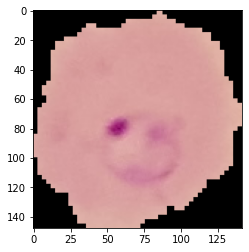

In [10]:
plt.imshow(imread(train_path+"parasitized\\"+paracell))

In [11]:
pcell=train_path+"parasitized\\"+paracell

In [12]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'uninfected'):
#     plt.imshow(img)   
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors= img.shape
    dim1.append(d1)
    dim2.append(d2)
    

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


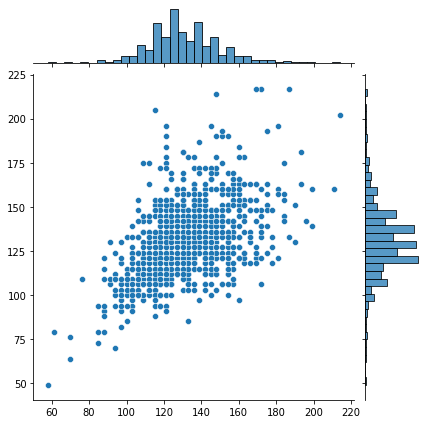

In [13]:
sns.jointplot(dim1,dim2)

In [14]:
np.mean(dim2)

130.75

In [15]:
image_shape=(130,130,3)

In [16]:
#> batches of data because big images
#> manipulate data so identify diff types of images

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

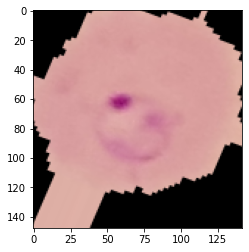

In [19]:
plt.imshow(image_gen.random_transform(imread(pcell)))

In [20]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [22]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [24]:
batch_size=16

In [25]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=True)

Found 24958 images belonging to 2 classes.


In [26]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)

In [30]:
results = model.fit(train_image_gen,epochs=10,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/10
1560/1560 [==============================] - 518s 331ms/step - loss: 0.8437 - accuracy: 0.5490 - val_loss: 0.6802 - val_accuracy: 0.5600
Epoch 2/10
1560/1560 [==============================] - 546s 350ms/step - loss: 0.6778 - accuracy: 0.5762 - val_loss: 0.6691 - val_accuracy: 0.5973
Epoch 3/10
1560/1560 [==============================] - 558s 358ms/step - loss: 0.6731 - accuracy: 0.5943 - val_loss: 0.6702 - val_accuracy: 0.5900
Epoch 4/10
1560/1560 [==============================] - 487s 312ms/step - loss: 0.6679 - accuracy: 0.5977 - val_loss: 0.6624 - val_accuracy: 0.6073
Epoch 5/10
1560/1560 [==============================] - 403s 258ms/step - loss: 0.3494 - accuracy: 0.8525 - val_loss: 0.2465 - val_accuracy: 0.9227
Epoch 6/10
1560/1560 [==============================] - 396s 254ms/step - loss: 0.1999 - accuracy: 0.9368 - val_loss: 0.2496 - val_accuracy: 0.9177
Epoch 7/10
1560/1560 [==============================] - 33054s 21s/step - loss: 0.1857 - accuracy: 0.9427 - val_

In [34]:
metrics=pd.DataFrame(model.history.history)

<AxesSubplot:>

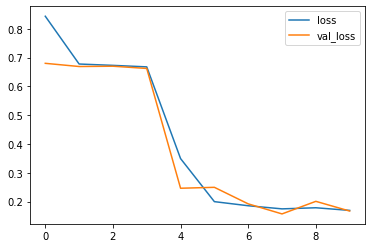

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [40]:
pwd

'C:\\Users\\svsma\\OneDrive\\Desktop\\ml\\LearningMachineLearning\\CNN'

In [41]:
model.save('C:\\Users\\svsma\\OneDrive\\Desktop\\ml\\LearningMachineLearning\\CNN')

INFO:tensorflow:Assets written to: C:\Users\svsma\OneDrive\Desktop\ml\LearningMachineLearning\CNN\assets


In [42]:
saved_path="C:\\Users\\svsma\\OneDrive\\Desktop\\ml\\LearningMachineLearning\\CNN\\assets"

In [46]:
predictions=model.predict(test_image_gen)

In [51]:
predictions*100


array([[ 2.7341902],
       [ 0.6437093],
       [ 2.1651447],
       ...,
       [97.97746  ],
       [98.21817  ],
       [98.17856  ]], dtype=float32)

In [52]:
p=lambda x:1 if x>50 else 0

In [ ]:
fin=map(p,predictions*100)